# Import Libraries

In [408]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression


# Load Dataset
This dataset features real estate listings across the United States, categorized by state and zip code. The original dataset, sourced from Kaggle, contained 2.2 million entries. We narrowed down the data by focusing exclusively on properties in Texas, resulting in a reduced dataset with 12 columns and 40,111 rows.


In [409]:
# Load the dataset into a pandas DataFrame

Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')


In [410]:
Real_Estate_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852,600.0,NaN
1,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632,NaN,NaN
2,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632,NaN,NaN
3,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632,NaN,NaN
4,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632,NaN,NaN


# Data Exploration and Cleaning

In the data exploration phase, we thoroughly examined the dataset to understand its structure, variable types, and key statistics. We utilized visualizations like histograms and scatter plots to identify patterns, relationships, and outliers in the data.

For data cleaning, we addressed missing values, removed duplicates, and ensured correct data types for each column. We also drop the columns we dont need for data analysis. The cleaned dataset was then validated and prepared for further analysis or modeling.

In [411]:
Real_Estate_data_df.shape

(40111, 12)

In [412]:
# Display the basic information of the dataframe
print(Real_Estate_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40111 entries, 0 to 40110
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     40093 non-null  float64
 1   status          40111 non-null  object 
 2   price           40053 non-null  float64
 3   bed             28761 non-null  float64
 4   bath            27158 non-null  float64
 5   acre_lot        36224 non-null  float64
 6   street          40004 non-null  float64
 7   city            40094 non-null  object 
 8   state           40111 non-null  object 
 9   zip_code        40111 non-null  int64  
 10  house_size      28903 non-null  float64
 11  prev_sold_date  15315 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [413]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   40093.000000  4.005300e+04  28761.000000  27158.000000  36224.000000   
mean    52715.409997  4.856361e+05      3.476931      2.678548     11.630184   
std     29786.509676  8.704503e+05      1.337864      1.212267    106.481943   
min        51.000000  0.000000e+00      1.000000      1.000000      0.000000   
25%     26918.000000  1.800000e+05      3.000000      2.000000      0.170000   
50%     52410.000000  3.400000e+05      3.000000      2.000000      0.340000   
75%     78031.000000  5.199000e+05      4.000000      3.000000      2.010000   
max    110142.000000  3.468000e+07     99.000000     25.000000   7085.560000   

             street      zip_code    house_size  
count  4.000400e+04  40111.000000  28903.000000  
mean   1.060828e+06  75815.313355   2314.157354  
std    6.059690e+05    772.033707   1379.643195  
min    2.300000e+01  11111.000000    100.000000  
25%    5.323715e+05  75206.00

In [414]:
Real_Estate_data_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [415]:
# Check the value counts
print(Real_Estate_data_df['status'].value_counts())

status
for_sale          38497
ready_to_build     1614
Name: count, dtype: int64


In [416]:
# checking for missing values
print(Real_Estate_data_df.isnull().sum())

brokered_by          18
status                0
price                58
bed               11350
bath              12953
acre_lot           3887
street              107
city                 17
state                 0
zip_code              0
house_size        11208
prev_sold_date    24796
dtype: int64


In [417]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


In [418]:
# Convert prev_sold_date to datetime
Real_Estate_data_df['prev_sold_date'] = pd.to_datetime(Real_Estate_data_df['prev_sold_date'])

In [419]:
Real_Estate_data_df.shape

(40111, 12)

In [420]:
missing_rows = Real_Estate_data_df[Real_Estate_data_df.isnull().any(axis=1)]
print(missing_rows)

       brokered_by    status     price  bed  bath  acre_lot     street  \
0          33968.0  for_sale   99000.0  1.0   1.0      5.00    49388.0   
1          88188.0  for_sale   58800.0  NaN   NaN      1.00   841041.0   
2          88188.0  for_sale   58800.0  NaN   NaN      1.00   844563.0   
3          88188.0  for_sale   58800.0  NaN   NaN      1.00   845421.0   
4          88188.0  for_sale   58800.0  NaN   NaN      1.00   859147.0   
...            ...       ...       ...  ...   ...       ...        ...   
40106      68915.0  for_sale  467847.0  5.0   4.0      0.19   773587.0   
40107      68915.0  for_sale  345249.0  5.0   3.0      0.19   772323.0   
40108      61150.0  for_sale  325000.0  NaN   NaN      0.68  1024251.0   
40109      68915.0  for_sale  456122.0  5.0   4.0      0.19   273557.0   
40110      61150.0  for_sale  325000.0  NaN   NaN      0.69  1024490.0   

                 city  state  zip_code  house_size prev_sold_date  
0           Terlingua  Texas     79852     

# Note:
After dropping NA's, data reduced to 13363 Rows. Would we want to drop the NA's or we want to fill it in with average (No. of Beds, No. Bath, and House size)

In [421]:
# dropping missing values
Clean_data_df = Real_Estate_data_df.dropna()
Clean_data_df.shape

(13363, 12)

In [422]:
# Verifying that there no more missing datas
print(Clean_data_df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [423]:
Clean_data_df.shape

(13363, 12)

In [424]:
# Verifying changes
Clean_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
18,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966,5888.0,2014-06-17
19,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948,1872.0,2022-04-28
23,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966,4248.0,2022-05-06
27,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932,1240.0,2022-01-28
28,30107.0,for_sale,134900.0,4.0,2.0,0.29,1463813.0,Newton,Texas,75966,2010.0,2021-07-29


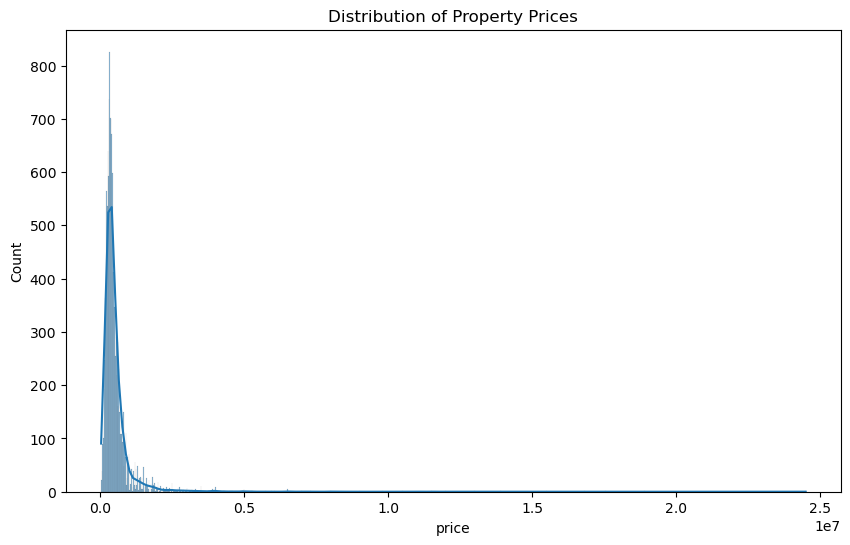

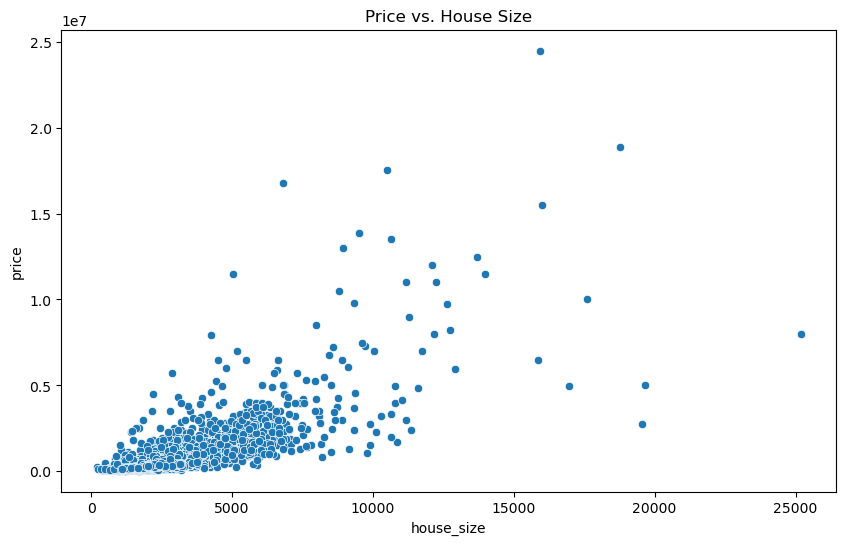

In [425]:
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(Clean_data_df['price'], kde=True)
plt.title('Distribution of Property Prices')
plt.show()

# Scatter plot of price vs. house size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=Clean_data_df)
plt.title('Price vs. House Size')
plt.show()

### Histogram of Prices
**Most properties are low to moderately priced:** The sharp peak at the lower end suggests that the majority of the properties in the dataset are within a more affordable price range.

**Few high-priced properties:** The long tail on the right indicates that there are some very high-priced properties, but they are rare compared to the lower-priced ones.

### Scatter plot of Price vs. House Size
**Positive Correlation:** Generally, there is a positive correlation between house size and price. This means that as the house size increases, the price tends to increase as well. This is evident from the upward trend where larger houses generally correspond to higher prices.

**Cluster of Points:** Most of the data points are clustered in the lower range of both house size (under 5,000 square feet) and price (under $500,000). This suggests that the majority of properties in the dataset are relatively smaller homes with lower prices.

**Outliers:** There are several points scattered far away from the main cluster, especially at higher house sizes and prices. These represent large, luxury properties that are much more expensive than the average. Some outliers are particularly notable for having high prices even with a relatively smaller house size, or very large house sizes with prices that may seem disproportionately high or low compared to the main trend.




# Data Transformation

1. Feature Engineering:
We create a new features that could capture important relationships: 
* We calculate the age of the house since it was last sold
* Calculate the Price per square foot
* Calculate the average house value per zip code
* Convert categorical variables: Convert city, state, and zip_code into numerical values using label encoding.


In [426]:

transform_data_df = Clean_data_df.copy()

# Calculate the age of the house since it was last sold
transform_data_df['house_age_since_sold'] = (pd.to_datetime('2024-08-30') - transform_data_df['prev_sold_date']).dt.days

# Calculate the Price per square foot
transform_data_df['price_per_sqft'] = transform_data_df['price'] / transform_data_df['house_size']

# Calculate the average house value per zip code
average_house_value_per_zipcode = transform_data_df.groupby('zip_code')['price'].mean().reset_index()

# Rename the column to be more descriptive
average_house_value_per_zipcode.rename(columns={'price': 'average_house_value_per_zipcode'}, inplace=True)

# Merge the average house value per zip code back to the original DataFrame
transform_data_df = transform_data_df.merge(average_house_value_per_zipcode, on='zip_code', how='left')

# Pad prices to 6 digits with leading zeros
transform_data_df['average_house_value_per_zipcode'] = transform_data_df['average_house_value_per_zipcode'].apply(lambda x: f"{int(x):06d}")
transform_data_df['price_per_sqft'] = transform_data_df['price_per_sqft'].apply(lambda x: f"{int(x):06d}")
transform_data_df['price'] = transform_data_df['price'].apply(lambda x: f"{int(x):06d}")

# Delete the 'status',column
transform_data_df = transform_data_df.drop(columns=['brokered_by','street','status'])

# Display the first few rows of the transformed dataframe
display(transform_data_df.head())

# Optionally, you can add more descriptive information
print("\nDataframe shape:", transform_data_df.shape)
print("\nDataframe data types:\n", transform_data_df.dtypes)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,349000,6.0,5.0,4.41,Newton,Texas,75966,5888.0,2014-06-17,3727,000059,237580
1,249500,2.0,2.0,1.19,Hemphill,Texas,75948,1872.0,2022-04-28,855,000133,280742
2,479000,5.0,4.0,6.28,Newton,Texas,75966,4248.0,2022-05-06,847,000112,237580
3,179900,3.0,2.0,2.23,Burkeville,Texas,75932,1240.0,2022-01-28,945,000145,244966
4,134900,4.0,2.0,0.29,Newton,Texas,75966,2010.0,2021-07-29,1128,000067,237580



Dataframe shape: (13363, 12)

Dataframe data types:
 price                                      object
bed                                       float64
bath                                      float64
acre_lot                                  float64
city                                       object
state                                      object
zip_code                                    int64
house_size                                float64
prev_sold_date                     datetime64[ns]
house_age_since_sold                        int64
price_per_sqft                             object
average_house_value_per_zipcode            object
dtype: object


In [427]:
transform_data_df.shape

(13363, 12)

In [428]:
transform_data_df.dtypes

price                                      object
bed                                       float64
bath                                      float64
acre_lot                                  float64
city                                       object
state                                      object
zip_code                                    int64
house_size                                float64
prev_sold_date                     datetime64[ns]
house_age_since_sold                        int64
price_per_sqft                             object
average_house_value_per_zipcode            object
dtype: object

In [429]:
# Identify categorical columns
categorical_columns = ['price','city', 'state', 'zip_code', 'prev_sold_date','price_per_sqft','average_house_value_per_zipcode']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    transform_data_df[column] = label_encoder.fit_transform(transform_data_df[column])

transform_data_df.head()

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,1028,6.0,5.0,4.41,311,0,326,5888.0,3052,3727,34,118
1,642,2.0,2.0,1.19,194,0,317,1872.0,4965,855,108,172
2,1466,5.0,4.0,6.28,311,0,326,4248.0,4972,847,87,118
3,381,3.0,2.0,2.23,58,0,309,1240.0,4897,945,120,123
4,201,4.0,2.0,0.29,311,0,326,2010.0,4773,1128,42,118


In [430]:
transform_data_df.dtypes

price                                int32
bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object

# At this point, each team needs to create one training model and make predictions using a method of their choice.

# Rebecca

In [431]:
# Set up X and Y variables

X = transform_data_df.drop(columns=['price'])  # Features (all columns except 'price')
y = transform_data_df['price'].values.reshape(-1,1)  # Target variable (price)

# Split the data into training and testing sets with 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42)

# Display the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12026, 11)
X_test shape: (1337, 11)
y_train shape: (12026, 1)
y_test shape: (1337, 1)


In [432]:
# Find the percentage of null values in each column
X_train.isna().sum()/len(X_train)

bed                                0.0
bath                               0.0
acre_lot                           0.0
city                               0.0
state                              0.0
zip_code                           0.0
house_size                         0.0
prev_sold_date                     0.0
house_age_since_sold               0.0
price_per_sqft                     0.0
average_house_value_per_zipcode    0.0
dtype: float64

In [433]:
# Identify categorical columns
# categorical_columns = ['city', 'state', 'zip_code', 'prev_sold_date','price_per_sqft','average_house_value_per_zipcode']

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
#for column in categorical_columns:
#    X_train[column] = label_encoder.fit_transform(X_train[column])

#X_train.head()

In [434]:
X_train.dtypes

bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object

In [435]:
print(X.dtypes)

bed                                float64
bath                               float64
acre_lot                           float64
city                                 int32
state                                int32
zip_code                             int64
house_size                         float64
prev_sold_date                       int64
house_age_since_sold                 int64
price_per_sqft                       int32
average_house_value_per_zipcode      int32
dtype: object


In [436]:
# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [437]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# On this Dataframe I am trying to use imputer to fill Nan fields with average value.

The result is Memory error when running the Model.

In [438]:
# Imputing NAN Fields

Real_Estate_data_imputed_df= Real_Estate_data_df.copy()

# Mean imputation for the selected columns
Real_Estate_data_imputed_df['bed'].fillna(Real_Estate_data_imputed_df['bed'].mean(), inplace=True)
Real_Estate_data_imputed_df['bath'].fillna(Real_Estate_data_imputed_df['bath'].mean(), inplace=True)
Real_Estate_data_imputed_df['house_size'].fillna(Real_Estate_data_imputed_df['house_size'].mean(), inplace=True)
Real_Estate_data_imputed_df['acre_lot'].fillna(Real_Estate_data_imputed_df['acre_lot'].mean(), inplace=True)
Real_Estate_data_imputed_df['prev_sold_date'].fillna(Real_Estate_data_imputed_df['prev_sold_date'].mean(), inplace=True)

print("\nDataFrame after Mean Imputation:")
print(Real_Estate_data_imputed_df)


DataFrame after Mean Imputation:
       brokered_by    status     price       bed      bath  acre_lot  \
0          33968.0  for_sale   99000.0  1.000000  1.000000      5.00   
1          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
2          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
3          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
4          88188.0  for_sale   58800.0  3.476931  2.678548      1.00   
...            ...       ...       ...       ...       ...       ...   
40106      68915.0  for_sale  467847.0  5.000000  4.000000      0.19   
40107      68915.0  for_sale  345249.0  5.000000  3.000000      0.19   
40108      61150.0  for_sale  325000.0  3.476931  2.678548      0.68   
40109      68915.0  for_sale  456122.0  5.000000  4.000000      0.19   
40110      61150.0  for_sale  325000.0  3.476931  2.678548      0.69   

          street            city  state  zip_code   house_size  \
0        49388.0       Terlingua  T

C:\Users\russe\AppData\Local\Temp\ipykernel_38136\2067991227.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Real_Estate_data_imputed_df['bed'].fillna(Real_Estate_data_imputed_df['bed'].mean(), inplace=True)
C:\Users\russe\AppData\Local\Temp\ipykernel_38136\2067991227.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

# Clean Dataset with Bed, Bath, House_size,acre_lot and prev_sold_date imputed with average value. I do this to retain the no. of rows

In [439]:
Clean_Real_Estate_data_imputed_df=Real_Estate_data_imputed_df.dropna() 

Clean_Real_Estate_data_imputed_df.shape

(39911, 12)

In [440]:
transform2_data_df = Clean_Real_Estate_data_imputed_df.copy()

# Calculate the age of the house since it was last sold
transform2_data_df['house_age_since_sold'] = (pd.to_datetime('2024-08-30') - transform2_data_df['prev_sold_date']).dt.days

# Calculate the Price per square foot
transform2_data_df['price_per_sqft'] = transform2_data_df['price'] / transform2_data_df['house_size']

# Calculate the average house value per zip code
average_house_value_per_zipcode = transform2_data_df.groupby('zip_code')['price'].mean().reset_index()

# Rename the column to be more descriptive
average_house_value_per_zipcode.rename(columns={'price': 'average_house_value_per_zipcode'}, inplace=True)

# Merge the average house value per zip code back to the original DataFrame
transform2_data_df = transform2_data_df.merge(average_house_value_per_zipcode, on='zip_code', how='left')

# Pad prices to 6 digits with leading zeros
transform2_data_df['average_house_value_per_zipcode'] = transform2_data_df['average_house_value_per_zipcode'].apply(lambda x: f"{int(x):06d}")
transform2_data_df['price_per_sqft'] = transform2_data_df['price_per_sqft'].apply(lambda x: f"{int(x):06d}")
transform2_data_df['price'] = transform2_data_df['price'].apply(lambda x: f"{int(x):06d}")

transform2_data_df.drop(columns=['brokered_by','status','street'],inplace=True)



transform2_data_df.head(10)

,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
0,099000,1.000000,1.000000,5.000000,Terlingua,Texas,79852,600.000000,2014-05-03 11:55:09.461312512,3771,000165,197000
1,058800,3.476931,2.678548,1.000000,Orange,Texas,77632,2314.157354,2014-05-03 11:55:09.461312512,3771,000025,215002
2,058800,3.476931,2.678548,1.000000,Orange,Texas,77632,2314.157354,2014-05-03 11:55:09.461312512,3771,000025,215002
3,058800,3.476931,2.678548,1.000000,Orange,Texas,77632,2314.157354,2014-05-03 11:55:09.461312512,3771,000025,215002
4,058800,3.476931,2.678548,1.000000,Orange,Texas,77632,2314.157354,2014-05-03 11:55:09.461312512,3771,000025,215002
5,058800,3.476931,2.678548,1.000000,Orange,Texas,77632,2314.157354,2014-05-03 11:55:09.461312512,3771,000025,215002
6,058800,3.476931,2.678548,1.040000,Orange,Texas,77632,2314.157354,2014-05-03 11:55:09.461312512,3771,000025,215002
7,477385,4.000000,3.000000,11.630184,Iowa Colony,Texas,77583,2300.000000,2014-05-03 11:55:09.461312512,3771,000207,477385
8,055000,3.476931,2.678548,1.700000,Camp Wood,Texas,78833,2314.157354,2014-05-03 11:55:09.461312512,3771,000023,055000
9,208000,4.000000,2.000000,1.070000,Stanton,Texas,79782,1460.000000,2014-05-03 11:55:09.461312512,3771,000142,208000


# Splitting the dataset into Training and Testing sets allowing 10% Test size

In [441]:
# Set up X and Y variables

X = transform2_data_df.drop(columns=['price'])  # Features (all columns except 'price')
y = transform2_data_df['price']  # Target variable (price)

# Split the data into training and testing sets with 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42)

# Display the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35919, 11)
X_test shape: (3992, 11)
y_train shape: (35919,)
y_test shape: (3992,)


In [442]:
X_train.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
34730,4.0,2.0,1.00,Aubrey,Texas,76227,2108.0,2008-05-21 00:00:00.000000000,5945,000156,487261
9826,3.0,2.0,0.25,Lake Dallas,Texas,75065,1476.0,2002-05-28 00:00:00.000000000,8130,000212,484833
3931,3.0,2.0,0.19,Joshua,Texas,76058,1765.0,2014-05-03 11:55:09.461312512,3771,000181,477422
1162,3.0,3.0,10.24,Sadler,Texas,76264,2300.0,2014-05-03 11:55:09.461312512,3771,000369,541652
34000,4.0,3.0,0.41,Weatherford,Texas,76087,2746.0,2014-05-03 11:55:09.461312512,3771,000214,555996


# Categorical Variables

In [443]:
# Identify categorical columns
categorical_columns = ['city', 'state', 'zip_code', 'prev_sold_date']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

X_train.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,house_age_since_sold,price_per_sqft,average_house_value_per_zipcode
34730,4.0,2.0,1.00,23,0,501,2108.0,1948,5945,000156,487261
9826,3.0,2.0,0.25,358,0,40,1476.0,898,8130,000212,484833
3931,3.0,2.0,0.19,333,0,439,1765.0,3002,3771,000181,477422
1162,3.0,3.0,10.24,575,0,522,2300.0,3002,3771,000369,541652
34000,4.0,3.0,0.41,665,0,456,2746.0,3002,3771,000214,555996


In [444]:
# checking the dtypes to know which column I need to change.
X.dtypes

bed                                       float64
bath                                      float64
acre_lot                                  float64
city                                       object
state                                      object
zip_code                                    int64
house_size                                float64
prev_sold_date                     datetime64[ns]
house_age_since_sold                        int64
price_per_sqft                             object
average_house_value_per_zipcode            object
dtype: object

In [445]:
# The MemoryError suggests that the model is trying to allocate more memory than is available.
# Let's try to reduce the memory usage by:
# 1. Reducing the number of trees (n_estimators)
# 2. Limiting the maximum depth of the trees
# 3. Increasing the minimum number of samples required to split an internal node

# First, let's check the shape of our training data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Now, let's create a RandomForestClassifier with memory-saving parameters
model = RandomForestClassifier(
    n_estimators=50,  # Reduced from 100
    max_depth=10,  # Limit the depth of trees
    min_samples_split=20,  # Increase minimum samples required to split a node
    n_jobs=-1  # Use all available cores
)

# Try to fit the model
rf_df = model.fit(X_train, y_train)

# If the above still doesn't work, you might need to use a different algorithm or reduce your dataset size

X_train shape: (35919, 11)
y_train shape: (35919,)


# Natalie

# Russell

### Scoring property investment values based on home features and seasonal trends ###

In [446]:
print(transform_data_df)

       price  bed  bath  acre_lot  city  state  zip_code  house_size  \
0       1028  6.0   5.0      4.41   311      0       326      5888.0   
1        642  2.0   2.0      1.19   194      0       317      1872.0   
2       1466  5.0   4.0      6.28   311      0       326      4248.0   
3        381  3.0   2.0      2.23    58      0       309      1240.0   
4        201  4.0   2.0      0.29   311      0       326      2010.0   
...      ...  ...   ...       ...   ...    ...       ...         ...   
13358    933  4.0   3.0      0.30   187      0       511      2864.0   
13359    858  4.0   3.0      0.18   187      0       511      2604.0   
13360   1149  4.0   3.0      0.38   187      0       511      2411.0   
13361    850  4.0   2.0      0.24   187      0       511      2089.0   
13362    712  4.0   2.0      0.19   187      0       511      2021.0   

       prev_sold_date  house_age_since_sold  price_per_sqft  \
0                3052                  3727              34   
1        

In [447]:
# Drop the state column its all texas and null so its dead weight
transform_data_df = transform_data_df.drop(columns=['state'])

# Print the updated dataframe to verify the change
print(transform_data_df.columns)
print(transform_data_df.head())


Index(['price', 'bed', 'bath', 'acre_lot', 'city', 'zip_code', 'house_size',
       'prev_sold_date', 'house_age_since_sold', 'price_per_sqft',
       'average_house_value_per_zipcode'],
      dtype='object')
   price  bed  bath  acre_lot  city  zip_code  house_size  prev_sold_date  \
0   1028  6.0   5.0      4.41   311       326      5888.0            3052   
1    642  2.0   2.0      1.19   194       317      1872.0            4965   
2   1466  5.0   4.0      6.28   311       326      4248.0            4972   
3    381  3.0   2.0      2.23    58       309      1240.0            4897   
4    201  4.0   2.0      0.29   311       326      2010.0            4773   

   house_age_since_sold  price_per_sqft  average_house_value_per_zipcode  
0                  3727              34                              118  
1                   855             108                              172  
2                   847              87                              118  
3                   945     

Top 10 properties by investment score:
       price   bed  bath  house_size  investment_score
7544     741  41.0  21.0     19567.0         99.000000
5502      76   6.0  11.0     17612.0         87.761218
7813     417   7.0  15.0     18769.0         85.073869
7826      79  14.0  15.0      9790.0         83.611854
8068     284   9.0  13.0     16001.0         83.456676
12670    125   8.0  11.0     13977.0         82.201776
8265     171   7.0  11.0     13692.0         80.201882
8268     144   6.0  10.0     12096.0         77.207768
7683     103   6.0   8.0     12234.0         76.613327
8317     103   6.0   9.0     11185.0         76.000970

Basic statistics of the investment score:
count    13363.000000
mean        32.024558
std         12.990917
min          1.000000
25%         22.278331
50%         31.836508
75%         40.855380
max         99.000000
Name: investment_score, dtype: float64

Number of outliers: 16

Outliers:


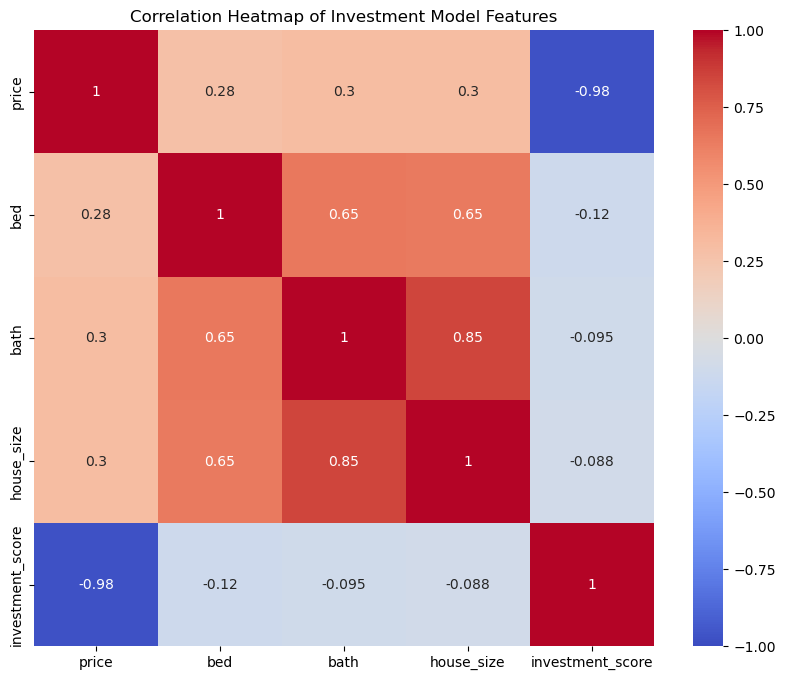

In [457]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select relevant features for scoring
features = ['price', 'bed', 'bath', 'house_size']

# Create a copy of the dataframe with selected features
investment_score_df = transform_data_df[features].copy()

# Normalize the features
scaler = MinMaxScaler()
investment_score_df_scaled = pd.DataFrame(scaler.fit_transform(investment_score_df), columns=investment_score_df.columns)

# Define weights for each feature
weights = {
    'price': -0.3,
    'bed': 0.1,
    'bath': 0.1,
    'house_size': 0.2
}

# Calculate the weighted score
for column in investment_score_df_scaled.columns:
    investment_score_df_scaled[column] *= weights[column]

# Sum up the scores
transform_data_df['investment_score'] = investment_score_df_scaled.sum(axis=1)

# Normalize the final score to be between 1 and 99
min_score = transform_data_df['investment_score'].min()
max_score = transform_data_df['investment_score'].max()
transform_data_df['investment_score'] = 1 + 98 * (transform_data_df['investment_score'] - min_score) / (max_score - min_score)

# Display the top 10 properties by investment score
print("Top 10 properties by investment score:")
print(transform_data_df[['price', 'bed', 'bath', 'house_size', 'investment_score']].sort_values('investment_score', ascending=False).head(10))

# Display some basic statistics
print("\nBasic statistics of the investment score:")
if 'investment_score' in transform_data_df.columns:
    print(transform_data_df['investment_score'].describe())
else:
    print("Error: 'investment_score' column not found in transform_data_df.")
    print("Available columns:", transform_data_df.columns.tolist())

# Identify and print outliers
Q1 = transform_data_df['investment_score'].quantile(0.25)
Q3 = transform_data_df['investment_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = transform_data_df[(transform_data_df['investment_score'] < lower_bound) | (transform_data_df['investment_score'] > upper_bound)]
print("\nNumber of outliers:", len(outliers))
print("\nOutliers:")
# Create a correlation matrix
correlation_matrix = transform_data_df[['price', 'bed', 'bath', 'house_size', 'investment_score']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Investment Model Features')
plt.show()

# Michael

# Lerma